In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import matplotlib.pyplot as plt
import sys
import os
# import warnings
# warnings.filterwarnings('ignore')

#user = 'madams01'
#sys.path.append(f'/home/{user}/git_clones/copymltox/ml-tox/src')
sys.path.append("/home/ishah/ipynb/ml-tox/src")
from mltox.db.mongo import *
from mltox.db.bc import *
from mltox.db.bio import *
from mltox.db.graph_utils import *

import functools
import seaborn as sns

Skipped loading some Jax models, missing a dependency. No module named 'haiku'


# Data

In [2]:
DB5 = openMongo(db='genra_dev_v5',host='localhost',auth=False)

In [3]:
get_bio_sources(DB5.toxcast_assays)
AS0 = get_bio_assays(DB5.toxcast_assays,src='ATG')

In [4]:
AR0 = get_bio_data(DB5,AS0,keep_dtx=True)

Loading ATG_AP_1_CIS
Loading ATG_AP_2_CIS
Loading ATG_AR_TRANS
Loading ATG_Ahr_CIS
Loading ATG_BRE_CIS
Loading ATG_CAR_TRANS
Loading ATG_CMV_CIS
Loading ATG_COUP_TF1_TRANS2
Loading ATG_COUP_TF2_TRANS2
Loading ATG_CRE_CIS
Loading ATG_C_EBP_CIS
Loading ATG_DAX1_TRANS2
Loading ATG_DR4_LXR_CIS
Loading ATG_DR5_RAR_CIS
Loading ATG_E2F_CIS
Loading ATG_EAR2_TRANS2
Loading ATG_EGR_CIS
Loading ATG_ERE_CIS
Loading ATG_ERRa_TRANS
Loading ATG_ERRb_TRANS2
Loading ATG_ERRg_TRANS
Loading ATG_ERa_TRANS
Loading ATG_ERb_TRANS2
Loading ATG_E_Box_CIS
Loading ATG_Ets_CIS
Loading ATG_FXR_TRANS
Loading ATG_FoxA2_CIS
Loading ATG_FoxO_CIS
Loading ATG_GAL4_TRANS
Loading ATG_GATA_CIS
Loading ATG_GCNF_TRANS2
Loading ATG_GLI_CIS
Loading ATG_GPCR_ADORA2A_TRANS
Loading ATG_GPCR_ADORA2B_TRANS
Loading ATG_GPCR_ADRA1A_TRANS
Loading ATG_GPCR_ADRA2B_TRANS
Loading ATG_GPCR_ADRB2_TRANS
Loading ATG_GPCR_ADRB3_TRANS
Loading ATG_GPCR_CHRM3_TRANS
Loading ATG_GPCR_DRD1_TRANS
Loading ATG_GPCR_DRD5_TRANS
Loading ATG_GPCR_EDNRA_TRA

In [5]:
AR0.shape

(3789, 134)

In [6]:
AR0.head()

,dsstox_sid,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_COUP_TF1_TRANS2,ATG_COUP_TF2_TRANS2,...,ATG_THRa1_TRANS,ATG_THRb_TRANS2,ATG_TLX_TRANS2,ATG_TR2_TRANS2,ATG_TR4_TRANS2,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_XTT_Cytotoxicity,ATG_Xbp1_CIS,ATG_p53_CIS
0,DTXSID0020232,0,1,0,0,0,0,1,-1.0,-1.0,...,0,-1.0,-1.0,-1.0,-1.0,0,0,0.0,0,0
1,DTXSID0020236,0,0,0,0,0,0,0,-1.0,-1.0,...,0,-1.0,-1.0,-1.0,-1.0,0,0,0.0,0,0
2,DTXSID0020280,0,0,0,1,0,0,0,-1.0,-1.0,...,0,-1.0,-1.0,-1.0,-1.0,0,0,0.0,0,0
3,DTXSID0020282,0,0,0,1,0,0,0,-1.0,-1.0,...,0,-1.0,-1.0,-1.0,-1.0,0,0,0.0,0,0
4,DTXSID0020284,1,0,1,1,0,0,1,-1.0,-1.0,...,0,-1.0,-1.0,-1.0,-1.0,1,1,1.0,1,1


In [7]:
MV_assay=(AR0==-1).sum(axis=0)


<AxesSubplot:ylabel='Count'>

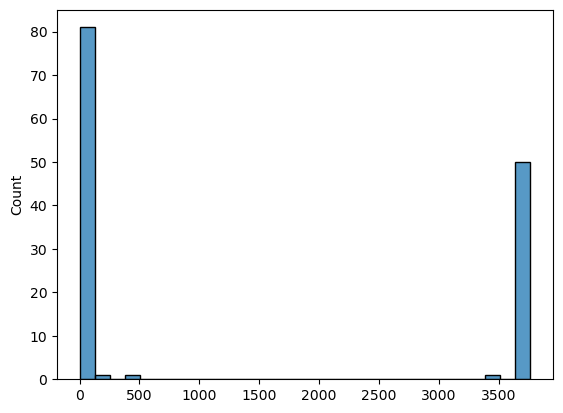

In [8]:
import seaborn as sns
sns.histplot(MV_assay,bins=30)

In [9]:
AS1 = MV_assay[MV_assay==0].index
AS1

Index(['dsstox_sid', 'ATG_AP_1_CIS', 'ATG_AP_2_CIS', 'ATG_AR_TRANS',
       'ATG_Ahr_CIS', 'ATG_BRE_CIS', 'ATG_CAR_TRANS', 'ATG_CMV_CIS',
       'ATG_CRE_CIS', 'ATG_C_EBP_CIS', 'ATG_DR4_LXR_CIS', 'ATG_DR5_RAR_CIS',
       'ATG_E2F_CIS', 'ATG_EGR_CIS', 'ATG_ERE_CIS', 'ATG_ERRa_TRANS',
       'ATG_ERRg_TRANS', 'ATG_ERa_TRANS', 'ATG_E_Box_CIS', 'ATG_Ets_CIS',
       'ATG_FXR_TRANS', 'ATG_FoxA2_CIS', 'ATG_FoxO_CIS', 'ATG_GATA_CIS',
       'ATG_GLI_CIS', 'ATG_GRE_CIS', 'ATG_GR_TRANS', 'ATG_HIF1a_CIS',
       'ATG_HNF4a_TRANS', 'ATG_HNF6_CIS', 'ATG_HSE_CIS', 'ATG_IR1_CIS',
       'ATG_ISRE_CIS', 'ATG_LXRa_TRANS', 'ATG_LXRb_TRANS', 'ATG_MRE_CIS',
       'ATG_M_06_CIS', 'ATG_M_06_TRANS', 'ATG_M_19_CIS', 'ATG_M_19_TRANS',
       'ATG_M_32_CIS', 'ATG_M_32_TRANS', 'ATG_M_61_CIS', 'ATG_M_61_TRANS',
       'ATG_Myb_CIS', 'ATG_Myc_CIS', 'ATG_NFI_CIS', 'ATG_NF_kB_CIS',
       'ATG_NRF1_CIS', 'ATG_NRF2_ARE_CIS', 'ATG_NURR1_TRANS',
       'ATG_Oct_MLP_CIS', 'ATG_PBREM_CIS', 'ATG_PPARa_TRANS',
       'A

In [10]:
AR1 = AR0[AS1]
MV_chem=(AR1==-1).sum(axis=1)

<AxesSubplot:ylabel='Count'>

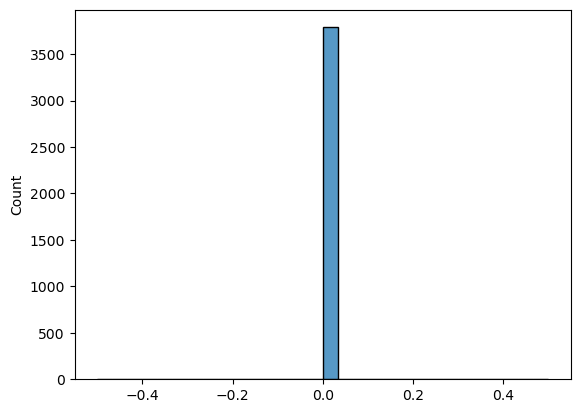

In [11]:
import seaborn as sns
sns.histplot(MV_chem,bins=30)

In [12]:
AR1

,dsstox_sid,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,ATG_C_EBP_CIS,...,ATG_Sp1_CIS,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS
0,DTXSID0020232,0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,DTXSID0020236,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,DTXSID0020280,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,DTXSID0020282,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DTXSID0020284,1,0,1,1,0,0,1,1,1,...,1,1,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,DTXSID90903854,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3785,DTXSID90903859,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3786,DTXSID90903874,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3787,DTXSID90903879,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
AR1[AR1==-1].sum(axis=1).sum()

0.0

In [14]:
#Assay_info = pd.DataFrame(DB5.toxcast_assays.find(dict(assay_component_name={'$in':AS1.tolist()}),dict(_id=0)))

In [16]:
#Assay_info[Assay_info.assay_component_name.str.contains('_M_0')]

In [17]:
CH0 = pd.DataFrame(DB5.compounds.find(dict(dsstox_sid={'$in':AR1.dsstox_sid.tolist()}),
                                      dict(_id=0,dsstox_sid=1,smiles=1)))

In [18]:
CH0.dropna().shape

(3479, 2)

In [21]:
CH_ATG = CH0.merge(AR1,on='dsstox_sid').dropna()

In [22]:
CH_ATG.shape

(3479, 82)

In [23]:
CH_ATG

,dsstox_sid,smiles,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,...,ATG_Sp1_CIS,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS
0,DTXSID0020232,CN1C=NC2=C1C(=O)N(C)C(=O)N2C,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,DTXSID0020236,[Ca++].CC(O)C([O-])=O.CC(O)C([O-])=O,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,DTXSID0020280,[O-][N+](=O)C1=C(Cl)C=CC=C1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,DTXSID0020282,NC1=CC(N)=C(Cl)C=C1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DTXSID0020284,OS(O)(=O)=O.NC1=CC=C(N)C(Cl)=C1,1,0,1,1,0,0,1,1,...,1,1,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,DTXSID9051907,COC1=NC=CN=C1CC(C)C,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3761,DTXSID9052505,CCCCC(C)=C,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3762,DTXSID9052509,OC1=CC=C(C=C1)C#N,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3763,DTXSID9052846,COCC(C)N(C(=O)CS(O)(=O)=O)C1=CSC=C1C,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
DAT='/home/ishah/ipynb/ml-tox/data/bio/'
CH_ATG.to_csv(DAT+'chm-atg.csv',index=False)